<h3><center>This Notebook contains House Prediction, Sentiment Classification, Document Retrieval, Song Recommender, Deep Features Classification, and Deep Features Image Retrieval tasks applied using TuriCreate</center></h3>
    
<h2><center><a href="#ref1">House Prediction</a></center></h2>
<h2><center><a href="#ref2"> Sentiment Classification </a></center></h2>
<h2><center><a href="#ref3"> Document Retrieval </a></center></h2>
<h2><center><a href="#ref4"> Song Recommender </a></center></h2>
<h2><center><a href="#ref5"> Deep Features Classification </a></center></h2>
<h2><center><a href="#ref6"> Deep Features Image Retrieval </a></center></h2>
<h2><center><a href="#ref7"> Loan Default Prediction using Gradient Boosting Trees </a></center></h2>


###### Launch Turi Create

In [30]:
import turicreate

<a id="ref1"></a>
<h1><center>House Prediction</center></h1>

# Load house sales data

In [31]:
sales = turicreate.SFrame('home_data.sframe')

In [32]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore

In [33]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [34]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [35]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [36]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.003252     | 4344525.356723     | 2230062.525049       | 263777.268583                   | 246595.310620                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

# Evaluate the quality of our model

In [37]:
print (test_set['price'].mean())

SUCCESS: Optimal solution found.

543054.0425632538


In [38]:
print (sqft_model.evaluate(test_set))

{'max_error': 4139590.830917217, 'rmse': 255199.08670015246}


# Explore model a little further

In [39]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47899.877111885464,5069.975619348367
sqft_living,None,282.4377195343447,2.230423660321369


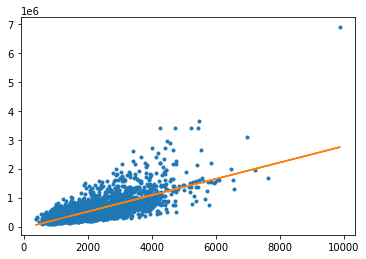

In [40]:
import matplotlib.pyplot as plt
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [41]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [42]:
sales[my_features].show()

Materializing SFrame

In [43]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [44]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.031524     | 4088162.310982     | 1573798.016844       | 189054.259626                   | 192687.143702                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [45]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [46]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4139590.830917217, 'rmse': 255199.08670015246}
{'max_error': 3166042.1731065726, 'rmse': 180381.02952850898}


# Apply learned models to make predictions

In [47]:
house1 = sales[sales['id']=='5309101200']

In [48]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [49]:
print (house1['price'])

[620000.0, ... ]


In [50]:
print (sqft_model.predict(house1))

[629950.6497705418]


In [51]:
print (my_features_model.predict(house1))

[729421.0844201389]


## Prediction for a second house, a fancier one

In [52]:
house2 = sales[sales['id']=='1925069082']

In [53]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [54]:
print (sqft_model.predict(house2))

[1262611.141527474]


In [55]:
print (my_features_model.predict(house2))

[1229061.881844111]


## Prediction for a super fancy home

In [56]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [57]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[14985127.071431793]


<a id="ref2"></a>
<h1><center>Analyze Product Sentiment</center></h1>

# Read product review data

In [58]:
products = turicreate.SFrame('amazon_baby.sframe')

# Explore data

In [59]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [60]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Examine the reivews for the most-reviewed product

In [61]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [62]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [63]:
len(giraffe_reviews)

785

In [64]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [65]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [66]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


# Define what is positive and negative sentiment

In [67]:
products['rating'].show()

Materializing SArray

In [68]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [69]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [70]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [71]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [72]:
train_data,test_data = products.random_split(.8,seed=0)

In [73]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.473605     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 1.099449     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 1.418554     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 1.616866     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 1.943103     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 3.001913     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the sentiment classifier to better understand the Giraffe reviews

In [74]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [75]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [76]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [77]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [78]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [79]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",1
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'will': 1.0, '15months':1.0, 'would': 2.0, ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'out': 1.0, 've': 1.0,'would': 1.0, 'enough': ...",1
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'whether': 1.0,'neutral': 1.0, 'gend ...",1
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'little':1.0, 'perfect': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0, 'must':1.0, 'overall': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",1
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",1


In [80]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,My 7 1/2 month oldgrandbaby was sittng up ...,1.0,"{'sopie': 1.0, 'with':1.0, 'be': 1.0, 'shou ...",0
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,"{'amazon': 1.0, 'back':1.0, 'by': 1.0, 'more': ...",0
Vulli Sophie the GiraffeTeether ...,Received the product andsmells like cheap rub ...,1.0,"{'was': 1.0, 'as': 1.0,'still': 1.0, 'but': ...",0
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,"{'typical': 1.0, 'paint':1.0, 'came': 1.0, 'mi ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'mom': 1.0, 'teethers':1.0, 'btw': 1.0, 'oth ...",0
Vulli Sophie the GiraffeTeether ...,When I received this thepaint was peeling off in ...,1.0,"{'worth': 1.0, 'for':1.0, 'about': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'ingest': 1.0, 'they':1.0, 'naturally': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'exaggerated': 1.0, 'a':3.0, 't': 2.0, 'stran ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'risk': 1.0, 'ready':1.0, 'bummed': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'amazon': 1.0, 'from':1.0, 'one': 1.0, 'by': ...",0


## Show the most positive reviews

In [81]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [82]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [83]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [84]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

<a id="ref3"></a>
<h1><center>Document retrieval from Wikipedia data</center></h1>

# Load some text data from Wikipedia

In [85]:
people = turicreate.SFrame('people_wiki.sframe')

In [86]:
people

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


# Explore data

## Taking a look at the entry for President Obama

In [87]:
obama = people[people['name'] == 'Barack Obama']

In [88]:
obama

URI,name,text
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...


In [89]:
obama['text']

dtype: str
Rows: ?
['barack hussein obama ii brk husen bm born august 4 1961 is the 44th and current president of the united states and the first african american to hold the office born in honolulu hawaii obama is a graduate of columbia university and harvard law school where he served as president of the harvard law review he was a community organizer in chicago before earning his law degree he worked as a civil rights attorney and taught constitutional law at the university of chicago law school from 1992 to 2004 he served three terms representing the 13th district in the illinois senate from 1997 to 2004 running unsuccessfully for the united states house of representatives in 2000in 2004 obama received national attention during his campaign to represent illinois in the united states senate with his victory in the march democratic party primary his keynote address at the democratic national convention in july and his election to the senate in november he began his presidential campa

## Explore the entry for actor George Clooney

In [90]:
clooney = people[people['name'] == 'George Clooney']
clooney['text']

dtype: str
Rows: ?
['george timothy clooney born may 6 1961 is an american actor writer producer director and activist he has received three golden globe awards for his work as an actor and two academy awards one for acting and the other for producingclooney made his acting debut on television in 1978 and later gained wide recognition in his role as dr doug ross on the longrunning medical drama er from 1994 to 1999 for which he received two emmy award nominations while working on er he began attracting a variety of leading roles in films including the superhero film batman robin 1997 and the crime comedy out of sight 1998 in which he first worked with a director who would become a longtime collaborator steven soderbergh in 1999 clooney took the lead role in three kings a wellreceived war satire set during the gulf warin 2001 clooneys fame widened with the release of his biggest commercial success the heist comedy oceans eleven the first of the film trilogy a remake of the 1960 film wit

# Word counts for Obama acticle

In [91]:
obama['word_count'] = turicreate.text_analytics.count_words(obama['text'])

In [92]:
obama

URI,name,text,word_count
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,"{'normalize': 1.0,'sought': 1.0, 'combat': ..."


In [93]:
print (obama['word_count'])

[{'normalize': 1.0, 'sought': 1.0, 'combat': 1.0, 'continued': 1.0, 'unconstitutional': 1.0, '8': 1.0, 'californias': 1.0, '1996': 1.0, 'marriage': 1.0, 'defense': 1.0, 'down': 1.0, 'proposition': 1.0, 'court': 1.0, 'supreme': 1.0, 'urged': 1.0, 'which': 1.0, 'briefs': 1.0, 'administration': 1.0, 'while': 1.0, 'americans': 1.0, 'called': 1.0, 'cuba': 1.0, 'gun': 1.0, 'related': 1.0, 'policies': 1.0, 'promoted': 1.0, '2013': 1.0, 'second': 2.0, 'romney': 1.0, 'filed': 1.0, '2012': 1.0, 'reelected': 1.0, 'taxpayer': 1.0, 'budget': 1.0, 'nations': 1.0, 'raise': 1.0, 'spending': 1.0, 'over': 1.0, 'lengthy': 1.0, 'gains': 1.0, 'seats': 1.0, '63': 1.0, 'total': 1.0, 'lost': 1.0, 'regained': 1.0, 'whether': 1.0, 'close': 1.0, 'patient': 1.0, 'by': 1.0, 'sandy': 1.0, 'after': 4.0, 'presidential': 2.0, 'november': 2.0, 'obama': 9.0, 'election': 3.0, 'august': 1.0, 'mccain': 1.0, 'primary': 2.0, 'he': 7.0, 'united': 3.0, 'with': 3.0, 'current': 1.0, 'campaign': 3.0, 'degree': 1.0, 'obamacare': 1

## Find most common words in Obama article

In [94]:
obama.stack('word_count',new_column_name=['word','count'])

URI,name,text,word,count
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,normalize,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,sought,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,combat,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,continued,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,unconstitutional,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,8,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,californias,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,1996,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,marriage,1.0
<http://dbpedia.org/resource/Barack_Obama> ...,Barack Obama,barack hussein obama iibrk husen bm born august ...,defense,1.0


In [95]:
obama_word_count_table = obama[['word_count']].stack('word_count', new_column_name = ['word','count'])

In [96]:
obama_word_count_table

word,count
normalize,1.0
sought,1.0
combat,1.0
continued,1.0
unconstitutional,1.0
8,1.0
californias,1.0
1996,1.0
marriage,1.0
defense,1.0


In [97]:
obama_word_count_table.sort('count',ascending=False)

word,count
the,40.0
in,30.0
and,21.0
of,18.0
to,14.0
his,11.0
obama,9.0
act,8.0
a,7.0
he,7.0


# Compute TF-IDF for the entire corpus of articles

In [98]:
people['word_count'] = turicreate.text_analytics.count_words(people['text'])

In [99]:
people

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne': 1.0,'parade': 1.0, ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time': 1.0, 'each':1.0, 'hour': 1.0, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society': 1.0,'hamilton': 1.0, 'to': ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis': 1.0,'awarded': 1.0, '2004': ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis': 1.0, '2007':1.0, 'cent': 1.0, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses': 1.0, 'sic':1.0, 'toilets': 1.0, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz': 1.0,'including': 1.0, ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia': 1.0,'creative': 1.0, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies': 1.0, 'new':1.0, 'brand': 1.0, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002': 1.0, 'harvard':1.0, 'twentieth': 1.0, ..."


In [100]:
people['tfidf'] = turicreate.text_analytics.tf_idf(people['text'])

In [101]:
people

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne': 1.0,'parade': 1.0, ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time': 1.0, 'each':1.0, 'hour': 1.0, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society': 1.0,'hamilton': 1.0, 'to': ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis': 1.0,'awarded': 1.0, '2004': ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis': 1.0, '2007':1.0, 'cent': 1.0, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses': 1.0, 'sic':1.0, 'toilets': 1.0, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz': 1.0,'including': 1.0, ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia': 1.0,'creative': 1.0, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies': 1.0, 'new':1.0, 'brand': 1.0, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002': 1.0, 'harvard':1.0, 'twentieth': 1.0, ..."


## Examine the TF-IDF for the Obama article

In [102]:
obama = people[people['name'] == 'Barack Obama']
obama[['tfidf']].stack('tfidf',new_column_name=['word','tfidf']).sort('tfidf',ascending=False)

word,tfidf
obama,43.2956530720749
act,27.67822262297991
iraq,17.747378587965535
control,14.887060845181308
law,14.722935761763422
ordered,14.533373950913514
military,13.115932778499415
involvement,12.784385241175055
response,12.784385241175055
democratic,12.410688697332166


## Examine the TF-IDF for Clooney

In [103]:
clooney = people[people['name'] == 'George Clooney']
clooney[['tfidf']].stack('tfidf',new_column_name=['word','tfidf']).sort('tfidf',ascending=False)

word,tfidf
clooney,30.47679823695488
thriller,19.64459743254604
drama,13.544372218899177
comedydrama,12.973371437789858
er,12.782751078181208
actor,11.832160900443771
categoriesclooney,10.986495389225194
heslov,10.986495389225194
producingclooney,10.986495389225194
comedy,10.481205264908446


# Manually evaluate the distance between certain people's articles

In [104]:
clinton = people[people['name'] == 'Bill Clinton']
beckham = people[people['name'] == 'David Beckham']

## Is Obama closer to Clinton or to Beckham?

In [105]:
turicreate.distances.cosine(obama['tfidf'][0],clinton['tfidf'][0])

0.8339854936884277

In [106]:
turicreate.distances.cosine(obama['tfidf'][0],beckham['tfidf'][0])

0.9791305844747478

# Apply nearest neighbors for retrieval of Wikipedia articles

## Build the NN model

In [107]:
knn_model = turicreate.nearest_neighbors.create(people,features=['tfidf'],label='name')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

## Use model for retrieval... for example, who is closest to Obama?

In [108]:
knn_model.query(obama)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 7.015ms      |

| Done         |         | 100         | 122.949ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Barack Obama,0.0,1
0,Joe Biden,0.7941176470588236,2
0,Joe Lieberman,0.7946859903381642,3
0,Kelly Ayotte,0.8119891008174387,4
0,Bill Clinton,0.8138528138528138,5


## Other examples of retrieval

In [109]:
swift = people[people['name'] == 'Taylor Swift']

In [110]:
knn_model.query(swift)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 6.19ms       |

| Done         |         | 100         | 125.292ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Taylor Swift,0.0,1
0,Carrie Underwood,0.7623188405797101,2
0,Alicia Keys,0.7647058823529411,3
0,Jordin Sparks,0.7696335078534031,4
0,Leona Lewis,0.7761194029850746,5


In [111]:
jolie = people[people['name'] == 'Angelina Jolie']

In [112]:
knn_model.query(jolie)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 7.398ms      |

| Done         |         | 100         | 127.94ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Angelina Jolie,0.0,1
0,Brad Pitt,0.7840236686390533,2
0,Julianne Moore,0.7958579881656804,3
0,Billy Bob Thornton,0.80306905370844,4
0,George Clooney,0.8046875,5


In [113]:
arnold = people[people['name'] == 'Arnold Schwarzenegger']

In [114]:
knn_model.query(arnold)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 6.065ms      |

| Done         |         | 100         | 128.269ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Arnold Schwarzenegger,0.0,1
0,Jesse Ventura,0.8189189189189189,2
0,John Kitzhaber,0.8246153846153846,3
0,Lincoln Chafee,0.8338762214983714,4
0,Anthony Foxx,0.8339100346020761,5


<a id="ref4"></a>
<h1><center>Build a song recommender system</center></h1>

# Load some music data

In [115]:
song_data = turicreate.SFrame('song_data.sframe/')

# Explore our data

In [116]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


## Show the most popular songs in the dataset

In [117]:
song_data['song'].show()

Materializing SArray

# Count the number of unique users in the data

In [118]:
users = song_data['user_id'].unique()

In [119]:
len(users)

66346

# Create a song recommender

In [120]:
train_data,test_data = song_data.random_split(.8,seed=0)

## Create a very simple popularity recommender

In [121]:
popularity_model = turicreate.popularity_recommender.create(train_data,
                                                           user_id = 'user_id',
                                                           item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.573709s

893580 observations to process; with 9952 unique items.

## Use the popularity model to make some predictions

In [122]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [123]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Sehr kosmisch - Harmonia,4754.0,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Undo - Björk,4227.0,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,You're The One - DwightYoakam ...,3781.0,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Revelry - Kings Of Leon,3527.0,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Secrets - OneRepublic,3148.0,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Hey_ Soul Sister - Train,2538.0,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Tive Sim - Cartola,2521.0,10


# Build a recommender with personalization

In [124]:
personalized_model = turicreate.item_similarity_recommender.create(train_data,
                                                                  user_id = 'user_id',
                                                                  item_id = 'song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.560945s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.327ms                        | 1.5        |

| 23.365ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 98.08ms                             | 0                | 0               |

| 542.952ms                           | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.587909s

## Apply personalized model to make song recommendations

In [125]:
personalized_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [126]:
personalized_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,There Goes My Baby -Usher ...,0.03319207429885864,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Panty Droppa [Intro](Album Version) - Trey ...,0.03185662031173706,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nobody (Featuring AthenaCage) (LP Version) - ...,0.027846765518188477,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Youth Against Fascism -Sonic Youth ...,0.026291418075561523,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nice & Slow - Usher,0.023963940143585206,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Making Love (Into TheNight) - Usher ...,0.023817694187164305,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Naked - Marques Houston,0.022892570495605467,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,I.nner Indulgence -DESTRUCTION ...,0.022076749801635744,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Love Lost (Album Version)- Trey Songz ...,0.020449769496917725,10


# Apply model to find similar songs in the data set

In [127]:
personalized_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [128]:
personalized_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


# Compare the models quantitatively
We now formally compare the popularity and the personalized models using precision-recall curves. 

In [129]:
model_performance = turicreate.recommender.util.compare_models(test_data, [popularity_model, personalized_model], user_sample=.05)

compare_models: using 2931 users to estimate model performance
PROGRESS: Evaluate model M0


recommendations finished on 1000/2931 queries. users per second: 28200

recommendations finished on 2000/2931 queries. users per second: 30124.1


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.02115319003752986  | 0.005507610778849264 |
|   2    | 0.017570794950528837 | 0.009505067130450953 |
|   3    | 0.016262936426703078 | 0.012877452923512295 |
|   4    | 0.015182531559194808 | 0.016728755341856673 |
|   5    | 0.014738996929375648 | 0.02158734021579469  |
|   6    | 0.01467076083248039  | 0.025593076130435415 |
|   7    | 0.014280840278793207 | 0.028842020218683484 |
|   8    | 0.014244285226885022 | 0.03250536945521591  |
|   9    | 0.013533492550892761 |  0.0349082548673132  |
|   10   | 0.012930740361651349 | 0.03701436741354864  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/2931 queries. users per second: 23085.1

recommendations finished on 2000/2931 queries. users per second: 23765.4


Precision and recall summary statistics by cutoff
+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.033776867963152525 | 0.010365124848236417 |
|   2    | 0.03275332650972367  | 0.018234745844776565 |
|   3    | 0.028090526555214358 | 0.023101589452664172 |
|   4    | 0.02516206073012623  | 0.02754695832996756  |
|   5    | 0.02299556465370183  | 0.03171445484649173  |
|   6    | 0.02121005345160923  | 0.03528550186687344  |
|   7    | 0.019739728030413815 | 0.037956605356810086 |
|   8    |  0.0185943364039577  | 0.04028286054898135  |
|   9    | 0.017551840479169044 | 0.04235948289172447  |
|   10   | 0.01675196178778576  | 0.044484574525516164 |
+--------+----------------------+----------------------+
[10 rows x 3 columns]



The table shows that the personalized model provides much better performance.

<a id="ref5"></a>
<h1><center>Using deep features to train an image classifier</center></h1>

# Load some data

In [130]:
image_train = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

# Explore this image data

/home/wsl-fanboy/turicreate/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

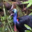
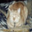
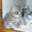
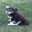
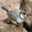
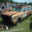
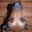
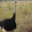
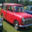
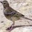
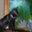
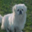
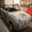
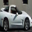
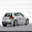
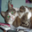
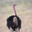
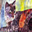
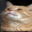
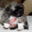
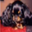
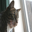
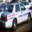
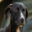
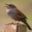
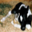
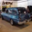
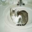
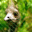
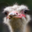
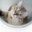
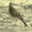
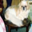
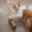
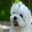
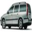
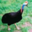
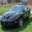
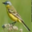
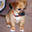
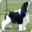
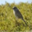
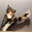
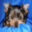
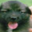
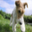
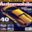
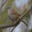
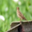
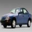
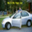
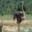
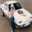
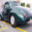
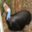
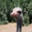
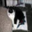
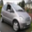
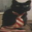
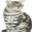
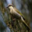
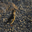
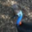
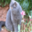
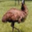
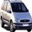
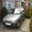
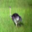
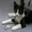
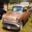
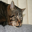
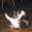
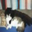
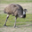
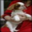
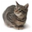
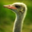
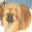
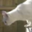
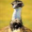
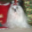
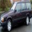
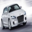
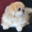
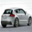
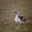
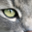
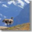
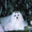
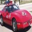
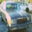
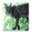
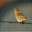
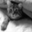
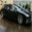
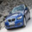
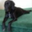
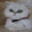
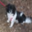
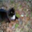

In [131]:
image_train['image'].explore()

# Train an image classifier on raw image pixels

In [132]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.026448  | 0.144128     | 0.272059          | 0.237624            |

| 1         | 10       | 2.248066  | 0.329371     | 0.412815          | 0.346535            |

| 2         | 11       | 2.248066  | 0.401877     | 0.366597          | 0.336634            |

| 3         | 13       | 1.000000  | 0.503974     | 0.436975          | 0.405941            |

| 4         | 19       | 4.475985  | 0.715364     | 0.458508          | 0.415842            |

| 9         | 30       | 1.158375  | 1.262854     | 0.518908          | 0.504950            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model

,SArray
0,
1,
2,

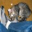
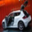
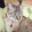

In [133]:
image_test[0:3]['image'].explore()

In [134]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [135]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [136]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.4815,
 'auc': 0.7212170000000006,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     cat      |       cat       |  408  |
 |     dog      |    automobile   |  103  |
 |     dog      |       bird      |  227  |
 |     cat      |    automobile   |  165  |
 |     dog      |       dog       |  385  |
 |     cat      |       dog       |  241  |
 |     bird     |    automobile   |  133  |
 |  automobile  |    automobile   |  629  |
 |     bird     |       cat       |  205  |
 |  automobile  |       bird      |  102  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.48068798615166963,
 'log_loss': 1.2066544056626713,
 'precisio

# Train image classifier using deep features

In [137]:
len(image_train)

2005

In [145]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [144]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Given the deep features, train a logistic classifier

In [146]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.196240     | 0.748950          | 0.643564            |

| 1         | 6        | 0.250000  | 0.455856     | 0.757878          | 0.742574            |

| 2         | 13       | 3.185237  | 0.902430     | 0.784664          | 0.752475            |

| 3         | 14       | 3.185237  | 1.034293     | 0.140756          | 0.168317            |

| 4         | 16       | 1.000000  | 1.225861     | 0.757878          | 0.722772            |

| 9         | 23       | 1.000000  | 1.996472     | 0.925945          | 0.881188            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images

,SArray
0,
1,
2,

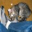
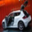
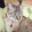

In [147]:
image_test[0:3]['image'].explore()

In [148]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [149]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79425,
 'auc': 0.9415617499999995,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       cat       |  121  |
 |     bird     |       dog       |   55  |
 |     dog      |       cat       |  194  |
 |  automobile  |       cat       |   18  |
 |     cat      |       bird      |   75  |
 |  automobile  |       dog       |   10  |
 |     cat      |    automobile   |   20  |
 |     dog      |       bird      |   56  |
 |     dog      |    automobile   |   7   |
 |     bird     |    automobile   |   11  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7949871032590743,
 'log_loss': 0.6347491560213614,
 'precisio

<a id="ref6"></a>
<h1><center>Image retrieval using deep features</center></h1>

# Load some CIFAR-10 images

In [150]:
image_data = turicreate.SFrame('image_train_data/')

/home/wsl-fanboy/turicreate/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

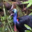
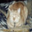
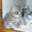
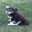
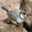
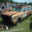
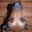
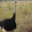
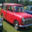
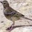
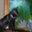
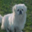
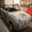
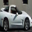
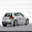
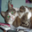
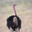
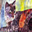
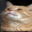
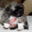
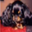
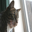
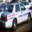
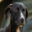
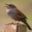
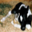
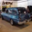
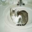
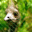
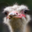
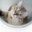
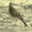
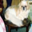
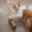
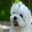
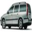
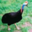
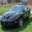
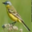
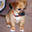
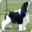
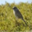
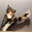
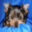
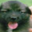
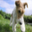
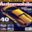
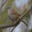
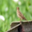
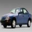
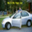
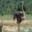
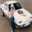
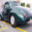
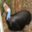
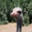
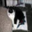
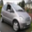
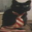
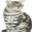
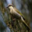
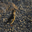
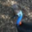
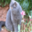
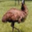
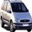
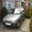
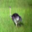
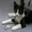
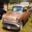
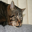
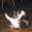
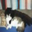
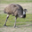
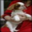
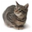
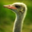
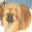
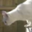
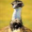
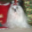
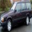
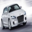
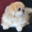
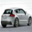
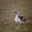
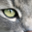
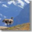
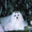
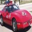
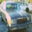
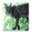
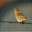
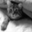
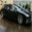
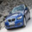
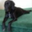
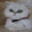
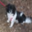
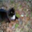

In [151]:
image_data['image'].explore()

# Compute deep features from our images

In [154]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [155]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Create a nearest neighbors model to retrieve images from deep features

In [156]:
knn_model = turicreate.nearest_neighbors.create(image_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

# Use image retrieval model with deep features to find similar images

In [157]:
cat = image_data[18:19]

,SArray
0,

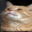

In [158]:
cat['image'].explore()

In [159]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.196ms      |

| Done         |         | 100         | 82.502ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [160]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [161]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.84ms       |

| Done         |         | 100         | 71.291ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

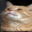
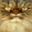
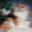
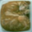
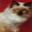

In [162]:
cat_neighbors['image'].explore()

# Find images similar to a car

In [163]:
car = image_data[8:9]

,SArray
0,

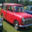

In [164]:
car['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.932ms      |

| Done         |         | 100         | 73.4ms       |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

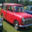
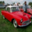
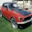
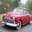
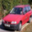

In [165]:
get_images_from_ids(knn_model.query(car))['image'].explore()

# Create a lambda function to find and show nearest neighbors to an image

In [166]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 10.039ms     |

| Done         |         | 100         | 74.142ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

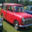
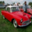
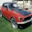
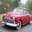
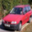

In [167]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.844ms      |

| Done         |         | 100         | 69.784ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

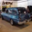
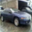
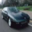
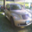
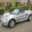

In [168]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.423ms      |

| Done         |         | 100         | 100.016ms    |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

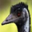
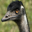
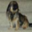
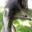
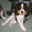

In [169]:
show_neighbors(500)

<a id="ref7"></a>
<h1><center>Loan Default Prediction using Gradient Boosting Trees</center></h1>

# Load LendingClub dataset

We will be using the [LendingClub](https://www.lendingclub.com/) data. As discussed earlier, the [LendingClub](https://www.lendingclub.com/) is a peer-to-peer leading company that directly connects borrowers and potential lenders/investors. 

we will build a classification model to predict whether or not a loan provided by lending club is likely to default.

In [3]:
loans = turicreate.SFrame('lending-club-data.sframe/')

In [4]:
loans.column_names()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'is_inc_v',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'not_compliant',
 'status',
 'inactive_loans',
 'bad_loans',
 'emp_length_num',
 'grade_num',
 'sub_grade_num',
 'delinq_2yrs_zero',
 'pub_rec

## Modifying the target column

The target column (label column) of the dataset that we are interested in is called `bad_loans`. In this column **1** means a risky (bad) loan **0** means a safe  loan.

In order to make this more intuitive, we reassign the target to be:
* **+1** as a safe  loan, 
* **-1** as a risky (bad) loan. 

We put this in a new column called `safe_loans`.

In [5]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

## Selecting features

We will be using a subset of features (categorical and numeric). The features we will be using are **described in the code comments** below. If you are a finance geek, the [LendingClub](https://www.lendingclub.com/) website has a lot more details about these features.

The features we will be using are described in the code comments below:

In [6]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

## Skipping observations with missing values

In [7]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print('Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows))

Dropping 29 observations; keeping 122578 


## Make sure the classes are balanced

We will undersample the larger class (safe loans) in order to balance out our dataset.

In [8]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print("Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data)))
print("Percentage of risky loans                :", len(risky_loans) / float(len(loans_data)))
print("Total number of loans in our new dataset :", len(loans_data))

Percentage of safe loans                 : 0.5022471668494506
Percentage of risky loans                : 0.4977528331505494
Total number of loans in our new dataset : 46503


## Split data into training and validation sets

In [9]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

# Gradient boosted tree classifier

We will now train models to predict `safe_loans` using the features above. In this section, we will experiment with training an ensemble of 5 trees.

In [10]:
model_5 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 5)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37219

Number of classes           : 2

Number of feature columns   : 24

Number of unpacked features : 24

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training Accuracy | Training Log Loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.053465     | 0.657541          | 0.657139          |

| 2         | 0.110814     | 0.656976          | 0.636157          |

| 3         | 0.161743     | 0.664983          | 0.623206          |

| 4         | 0.208183     | 0.668476          | 0.613783          |

| 5         | 0.256854     | 0.673339          | 0.606229          |

+-----------+--------------+-------------------+-------------------+

# Making predictions

In [11]:
# Select all positive and negative examples.
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

# Select 2 examples from the validation set for positive & negative loans
sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

# Append the 4 examples into a single dataset
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

Columns:
	safe_loans	int
	grade	str
	sub_grade_num	float
	short_emp	int
	emp_length_num	int
	home_ownership	str
	dti	float
	purpose	str
	payment_inc_ratio	float
	delinq_2yrs	int
	delinq_2yrs_zero	int
	inq_last_6mths	int
	last_delinq_none	int
	last_major_derog_none	int
	open_acc	int
	pub_rec	int
	pub_rec_zero	int
	revol_util	float
	total_rec_late_fee	float
	int_rate	float
	total_rec_int	float
	annual_inc	int
	funded_amnt	int
	funded_amnt_inv	int
	installment	float

Rows: 4

Data:
+------------+-------+---------------+-----------+----------------+----------------+
| safe_loans | grade | sub_grade_num | short_emp | emp_length_num | home_ownership |
+------------+-------+---------------+-----------+----------------+----------------+
|     1      |   B   |      0.2      |     0     |       3        |    MORTGAGE    |
|     1      |   B   |      0.6      |     1     |       1        |      RENT      |
|     -1     |   D   |      0.4      |     0     |       3        |      RENT      |
|     -1     |   A   |      1.0      |     0     |       11       |    MORTGAGE    |
+------------+-------+---------------+-----------+----------------+----------------+
+-------+--------------------+-------------------+-------------+------------------+
|  dti  |      purpose       | payment_inc_ratio | delinq_2yrs | delinq_2yrs_zero |
+-------+--------------------+-------------------+-------------+------------------+
| 29.44 |    credit_card     |      6.30496      |      0      |        1         |
| 12.19 |    credit_card     |      13.4952      |      0      |        1         |
| 13.97 |       other        |      2.96736      |      3      |        0         |
| 16.33 | debt_consolidation |      1.90524      |      0      |        1         |
+-------+--------------------+-------------------+-------------+------------------+
+----------------+------------------+-----------------------+----------+---------+
| inq_last_6mths | last_delinq_none | last_major_derog_none | open_acc | pub_rec |
+----------------+------------------+-----------------------+----------+---------+
|       0        |        1         |           1           |    8     |    0    |
|       0        |        1         |           1           |    8     |    0    |
|       0        |        0         |           1           |    14    |    0    |
|       0        |        1         |           1           |    17    |    0    |
+----------------+------------------+-----------------------+----------+---------+
+--------------+------------+--------------------+----------+-----+
| pub_rec_zero | revol_util | total_rec_late_fee | int_rate | ... |
+--------------+------------+--------------------+----------+-----+
|      1       |    93.9    |        0.0         |   9.91   | ... |
|      1       |    59.1    |        0.0         |  11.71   | ... |
|      1       |    59.5    |        0.0         |  16.77   | ... |
|      1       |    62.1    |        0.0         |   8.9    | ... |
+--------------+------------+--------------------+----------+-----+
[4 rows x 25 columns]

### Predicting on sample validation data

In [12]:
model_5.predict(sample_validation_data)

dtype: int
Rows: 4
[1, 1, -1, 1]

In [13]:
model_5.predict(sample_validation_data, output_type='probability')

dtype: float
Rows: 4
[0.7045905590057373, 0.5963408946990967, 0.44925159215927124, 0.6119099855422974]

## Evaluating the model on the validation data

In [14]:
model_5.evaluate(validation_data)

{'accuracy': 0.66813873330461,
 'auc': 0.7247215702188436,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  1618 |
 |      -1      |        -1       |  3054 |
 |      1       |        -1       |  1463 |
 |      1       |        1        |  3149 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.6715001599317625,
 'log_loss': 0.6176131769693981,
 'precision': 0.6605831760016782,
 'recall': 0.6827840416305291,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+------+------+
 | threshold | fpr | tpr |  p   |  n   |
 +-----------+-----+-----+------+------+
 |    0.0    | 1.0 | 1.0 | 4612 | 4672 |
 |   1e-05   | 1.0 | 1.0 | 4612 | 4672 |
 |   2e-05   | 1.0 | 

In [15]:
confusion_matrix = model_5.evaluate(validation_data)['confusion_matrix']
confusion_matrix

target_label,predicted_label,count
-1,1,1618
-1,-1,3054
1,-1,1463
1,1,3149


In [16]:
# false_positives = (validation_data[validation_data['safe_loans'] != predictions]['safe_loans'] == -1).sum()
false_positives = confusion_matrix[(confusion_matrix['target_label'] == -1) & (confusion_matrix['predicted_label'] == 1)]['count'][0]
false_positives

1618

In [17]:
# false_negatives = (validation_data[validation_data['safe_loans'] != predictions]['safe_loans'] == +1).sum()
false_negatives = confusion_matrix[(confusion_matrix['target_label'] == 1) & (confusion_matrix['predicted_label'] == -1)]['count'][0]
false_negatives

1463

## Most positive & negative loans.

In [18]:
validation_data['predictions'] = model_5.predict(validation_data, output_type='probability')

In [19]:
validation_data[['grade','predictions']].sort('predictions', ascending = False)[0:5]

grade,predictions
A,0.848508358001709
A,0.848508358001709
A,0.8412954211235046
A,0.8412954211235046
A,0.8412954211235046


In [20]:
validation_data[['grade','predictions']].sort('predictions', ascending = True)[0:5]

grade,predictions
D,0.13427510857582092
C,0.13427510857582092
B,0.13427510857582092
C,0.13427510857582092
C,0.13427510857582092


## Effect of adding more trees

In [21]:
model_10 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 10, verbose=False)
model_50 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 50, verbose=False)
model_100 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 100, verbose=False)
model_200 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 200, verbose=False)
model_500 = turicreate.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 500, verbose=False)

## Compare accuracy on entire validation set

In [22]:
print (model_10.evaluate(validation_data)['accuracy'])
print (model_50.evaluate(validation_data)['accuracy'])
print (model_100.evaluate(validation_data)['accuracy'])
print (model_200.evaluate(validation_data)['accuracy'])
print (model_500.evaluate(validation_data)['accuracy'])

0.6727703576044808
0.6907582938388626
0.6917277035760449
0.684510986643688
0.6718009478672986


## Plot the training and validation error vs. number of trees

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [24]:
train_err_10 = 1 - model_10.evaluate(train_data)['accuracy']
train_err_50 = 1 - model_50.evaluate(train_data)['accuracy']
train_err_100 = 1 - model_100.evaluate(train_data)['accuracy']
train_err_200 = 1 - model_200.evaluate(train_data)['accuracy']
train_err_500 = 1 - model_500.evaluate(train_data)['accuracy']

In [25]:
training_errors = [train_err_10, train_err_50, train_err_100, 
                   train_err_200, train_err_500]

In [26]:
validation_err_10 = 1 - model_10.evaluate(validation_data)['accuracy']
validation_err_50 = 1 - model_50.evaluate(validation_data)['accuracy']
validation_err_100 = 1 - model_100.evaluate(validation_data)['accuracy']
validation_err_200 = 1 - model_200.evaluate(validation_data)['accuracy']
validation_err_500 = 1 - model_500.evaluate(validation_data)['accuracy']

In [27]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, 
                     validation_err_200, validation_err_500]

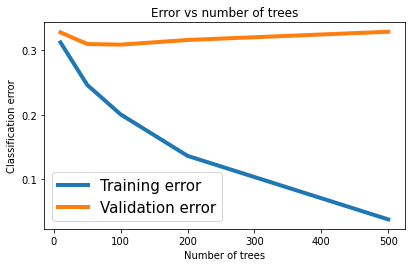

In [28]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')